# 911 Calls Capstone Project

For this project I will be analyzing 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

The following libraries will be utilized:
numpy
pandas
matplotlib
seaborn

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Info Questions

** What are the top 5 zipcodes for 911 calls? **

In [11]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [12]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Determine how many unique title codes (reasons for call) are in the df **

In [13]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I will create a new column called "Reason" to split the reasons with a custom lambda expression.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [22]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** Determines the most common Reason for a 911 call based off of the new column **

In [23]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Creates a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

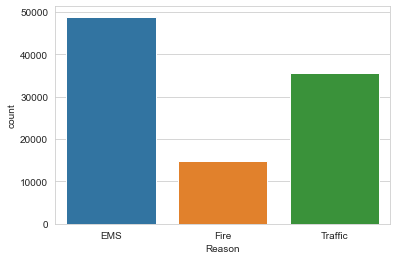

In [24]:
sns.countplot(x='Reason',data=df)

___
** Now I will analyze the time information within the timeStamp column. **

**The timeStamp column is a string so I will convert it to DateTime objects using pd.to_datetime**

In [28]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** This allows me to grab specific attributes from a Datetime object by calling them. For example:**

In [37]:
time = df['timeStamp'].iloc[0]
time.month

12

** Now I will use this method to create columns for the hour, month, and day of the week based on the timeStamp column.**

In [38]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Since the Day of Week is an integer 0-6. You can use the .map() with this dictionary to map the actual string names to the day of the week: **

In [39]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [40]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Using the seaborn library, I will create a countplot of the Day of Week column and the Month column with the hue based off of the Reason column. **

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

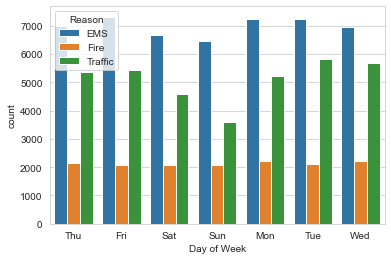

In [41]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

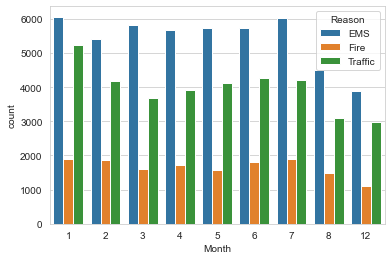

In [42]:
sns.countplot(x='Month',data=df,hue='Reason')

**This method does not return information for every month**

_____

** I will fill in this information by plotting a simple line plot that fills in the missing months, in order to do this, I'll be using the pandas library. **

** I am creating a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.**

In [51]:
byMonth = df.groupby(by='Month').count().head(12)
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now I will create the simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

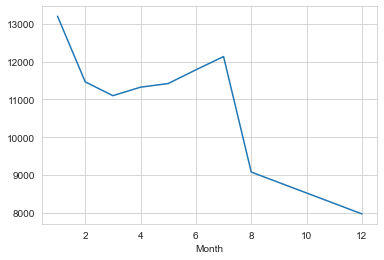

In [61]:
byMonth['e'].plot()

** Now I can use seaborn's lmplot() to create a linear fit on the number of calls per month.**

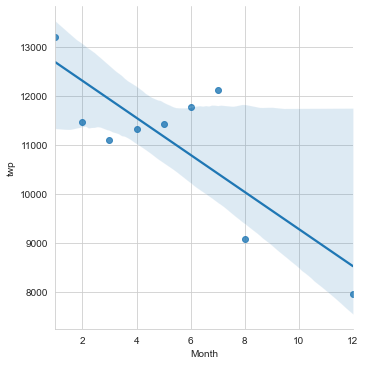

In [60]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**I am creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [62]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

** Now I can use groupby with the Date column with the count() aggregate and create a plot of counts of 911 calls.**

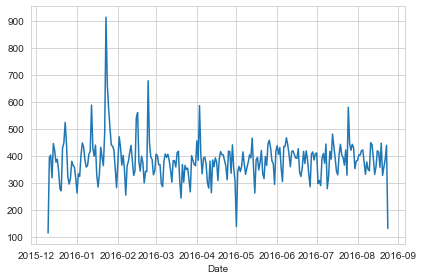

In [68]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now I will recreate this plot with 3 plots for each Reason for the 911 call**

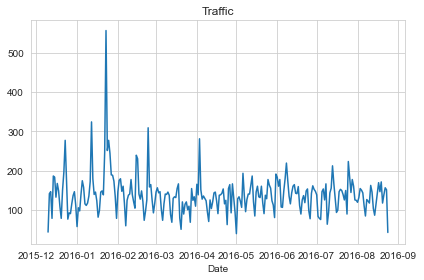

In [79]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

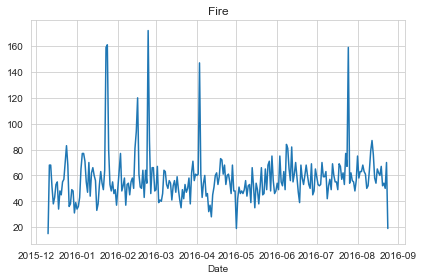

In [80]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

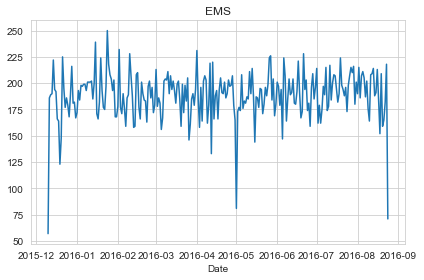

In [81]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

** Now I create = heatmaps with seaborn and our data. I need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week by combining groupby with the unstack method.**

In [92]:
hourday = df.groupby(['Day of Week','Hour']).count()['Reason'].unstack(level=-1)
hourday.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

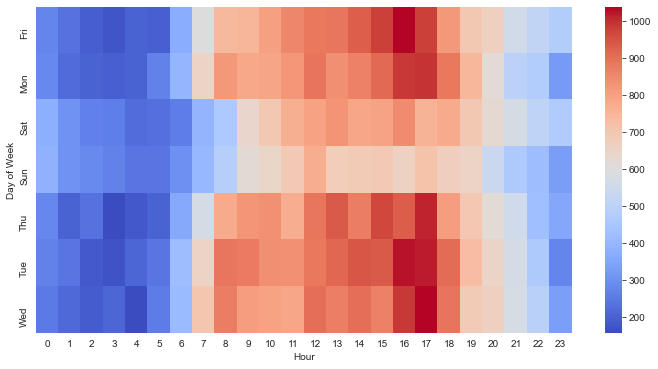

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(data=hourday,cmap='coolwarm')

** Now I will create a clustermap using this DataFrame. **

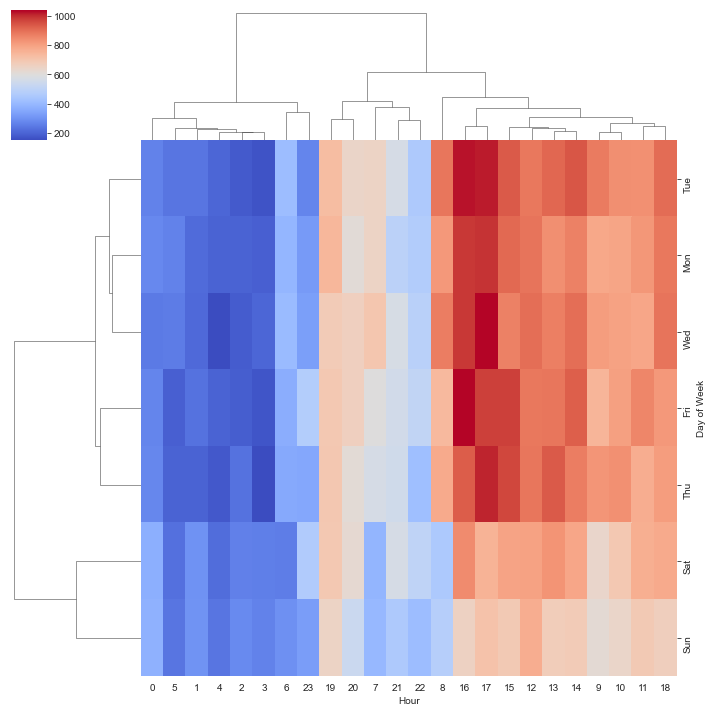

In [96]:
sns.clustermap(hourday,cmap='coolwarm')

** Now I will repeat these steps with the DataFrame with the Month as the column. **

In [98]:
monthday = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack(-1)
monthday.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

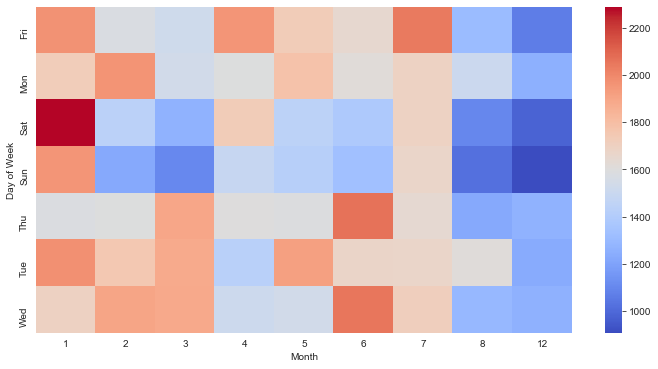

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(monthday,cmap='coolwarm')

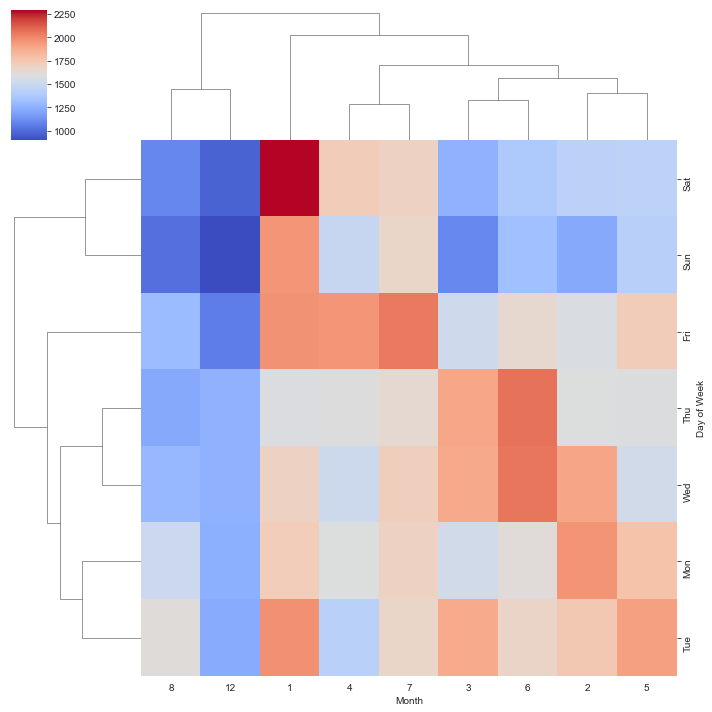

In [101]:
sns.clustermap(monthday,cmap='coolwarm')